Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.

### Importing libraries

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [51]:
#importing dataset
data = pd.read_excel('Flight_Fare.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648



 ## Basic Checks

In [52]:
#columns
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [53]:
#checking total records
print('Total number of rows :',data.shape[0])
print('Total number of rows :',data.shape[1])

Total number of rows : 10683
Total number of rows : 11


In [54]:
#checking datatypes
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [55]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [56]:
#missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Insights

* In 'Destination' feature, there are 2 values for 'Delhi'.
* Same as in 'Additional' info, there are two values for 'No Info'.

### Converting date and time columns from object to date and time

In [57]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])

In [58]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [59]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-31 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-31 05:50:00,2024-12-31 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-31 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-31 18:05:00,2024-12-31 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-31 16:50:00,2024-12-31 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2024-12-31 19:55:00,2024-12-31 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2024-12-31 20:45:00,2024-12-31 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2024-12-31 08:20:00,2024-12-31 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2024-12-31 11:30:00,2024-12-31 14:10:00,2h 40m,non-stop,No info,12648


In [60]:
#Extracting necessary values from 'Date_of_Journey','Dep_Time' and 'Arrival_Time'

data['Journey_day']=pd.to_datetime(data.Date_of_Journey,format='%d%m%Y').dt.day
data['Journey_month']=pd.to_datetime(data.Date_of_Journey,format='%d%m%Y').dt.month

data['Dep_hour']=pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_min']=pd.to_datetime(data.Dep_Time).dt.minute

data['Arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_min']=pd.to_datetime(data.Arrival_Time).dt.minute

#dropping all 3 main columns

data.drop(['Date_of_Journey','Arrival_Time','Dep_Time'],inplace=True,axis=1)

In [61]:
#converting duration into total minutes
data.Duration=data.Duration.str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [62]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,12648,1,3,11,30,14,10


In [63]:
#creating separate list for numerical and categorical columns
numerical=[]
categorical=[]

for i in data.columns:
    if data[i].dtype=='object':
        categorical.append(i)
    else:
        numerical.append(i)

print('Numerical features :',numerical)
print('Categorical features :',categorical)

Numerical features : ['Duration', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min']
Categorical features : ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [64]:
#Replacing 'New Delhi' as 'Delhi' in Destination column
data.Destination = data.Destination.replace('New Delhi','Delhi')

#similarly replacing 'No Info' as 'No info' in Additional_info column
data.Additional_Info = data.Additional_Info.replace('No Info','No info')

In [65]:
#checking duplicated values
data.duplicated().sum()

222

In [66]:
#droping duplicated values
data.drop_duplicates(inplace=True)

In [67]:
#records after dropping duplicated values
data.shape

(10461, 14)

In [68]:
#There are missing values in two categorical columns : Route, Total_Stops
#since its categorical, imputing the missing values with mode
data.loc[data.Route.isnull(),'Route']=data.Route.mode()[0]
data.loc[data.Total_Stops.isnull(),'Total_Stops']=data.Total_Stops.mode()[0]

In [69]:
#checking missing values after imputation
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
dtype: int64

In [70]:
#checking stats for numerical features
data.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Duration,10461.000000,629.945034,500.742197,5.000000,170.000000,505.000000,910.000000,2860.000000
Price,10461.000000,9027.212504,4624.861032,1759.000000,5224.000000,8266.000000,12346.000000,79512.000000
Journey_day,10461.000000,13.462480,8.466967,1.000000,6.000000,12.000000,21.000000,27.000000
Journey_month,10461.000000,4.701845,1.163624,3.000000,3.000000,5.000000,6.000000,6.000000
Dep_hour,10461.000000,12.476341,5.726072,0.000000,8.000000,11.000000,18.000000,23.000000
Dep_min,10461.000000,24.408278,18.817167,0.000000,5.000000,25.000000,40.000000,55.000000
Arrival_hour,10461.000000,13.389638,6.853854,0.000000,8.000000,14.000000,19.000000,23.000000
Arrival_min,10461.000000,24.723258,16.569495,0.000000,10.000000,25.000000,35.000000,55.000000


In [71]:
#checking missing values for categorical features
data.describe(include='O')

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
count,10461,10461,10461,10461,10461,10461
unique,12,5,5,128,5,9
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
freq,3700,4346,4346,2377,5626,8184


In [72]:
data.to_csv()

',Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min\r\n0,IndiGo,Banglore,Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10\r\n1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15\r\n2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25\r\n3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30\r\n4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35\r\n5,SpiceJet,Kolkata,Banglore,CCU → BLR,145,non-stop,No info,3873,24,6,9,0,11,25\r\n6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,930,1 stop,In-flight meal not included,11087,12,3,18,55,10,25\r\n7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1265,1 stop,No info,22270,1,3,8,0,5,5\r\n8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1530,1 stop,In-flight meal not included,11087,12,3,8,55,10,25\r\n9,Multiple carriers,Delhi,Co

### Insights

* The minimum ticket price is 1759 rupees and the maximum ticket price is 79512 rupees.
* The minimum duration of the journey is 5 minutes and maximum duration is about 48 hours.
* Outliers are present in duration and price columns as we can see huge difference between 75% and max value.
* More people opted for jet airways.
* Almost 40% people were from Delhi.
* Almost 40% people travelled to Cochin.
* Std Deviations are higher which indicates spread of data.

# EDA

### Flight Distribution source wise

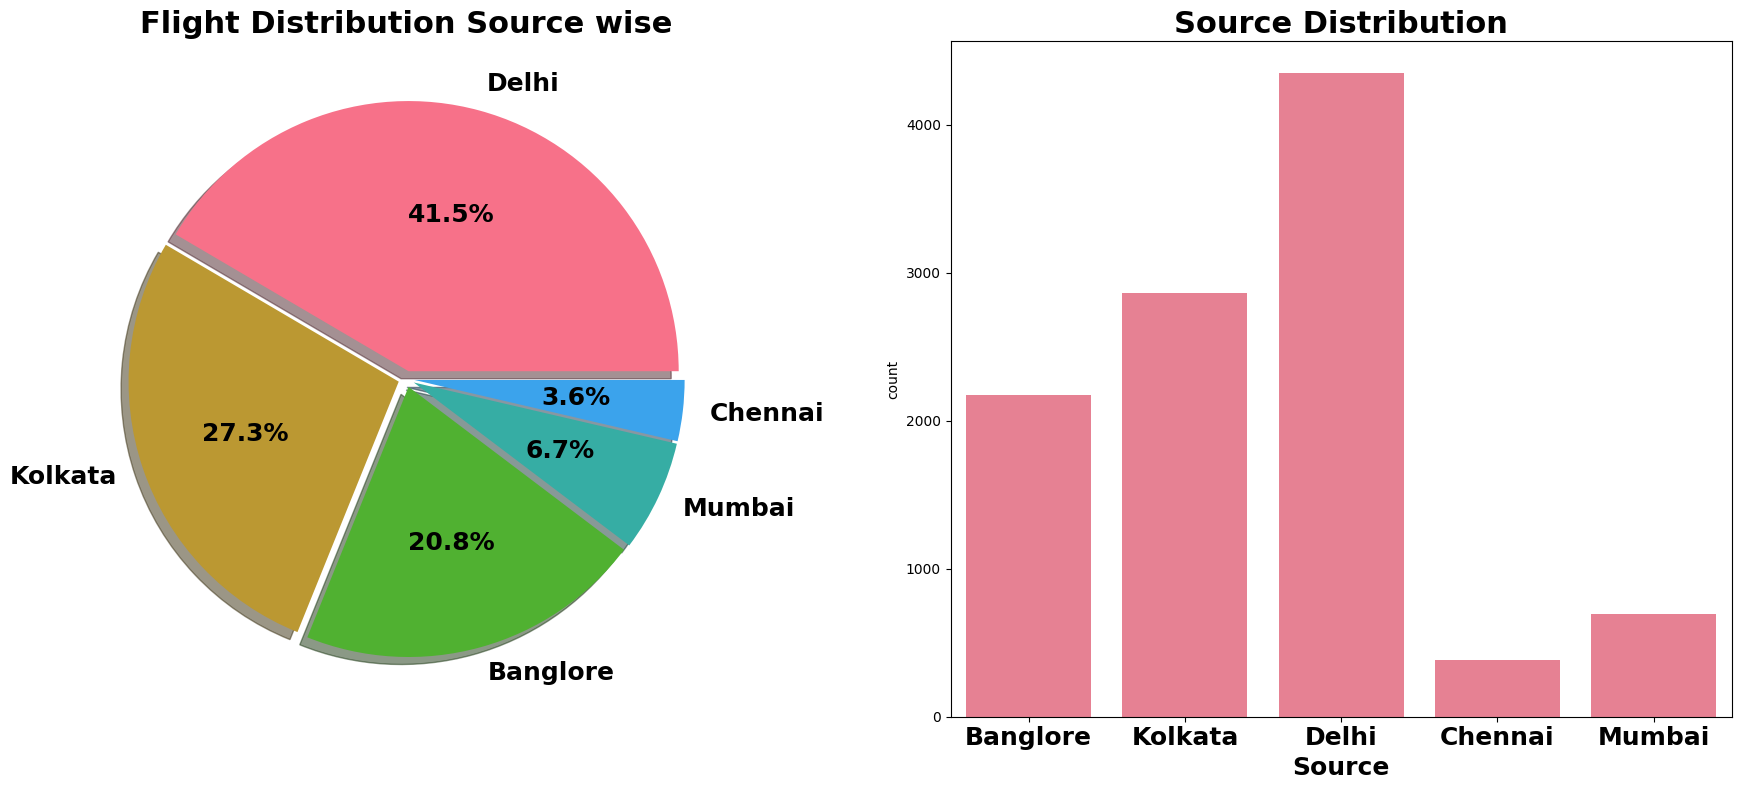

In [73]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Source'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Flight Distribution Source wise', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Source',data=data,ax=ax[1])
ax[1].set_title('Source Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Source",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Insights
* Most of the people were from Delhi.

### Source with respect to target variable

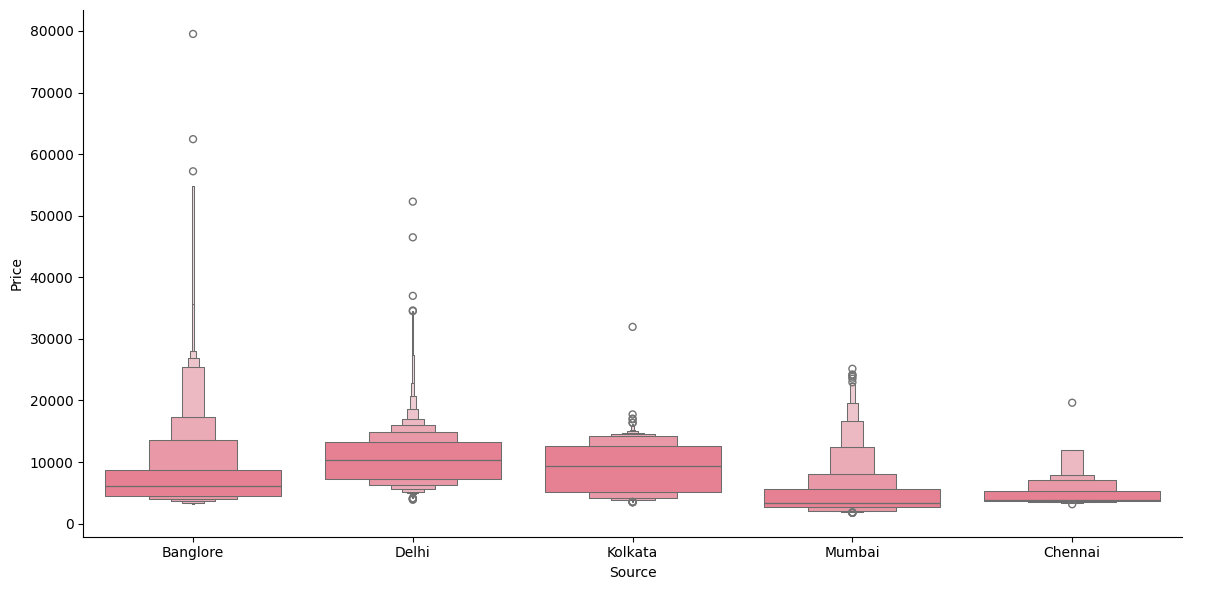

In [74]:
sns.catplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=2)
plt.show()

#### Insights
* Maximum fare comes for Bangalore flight.

### Flight distribution as per Airline

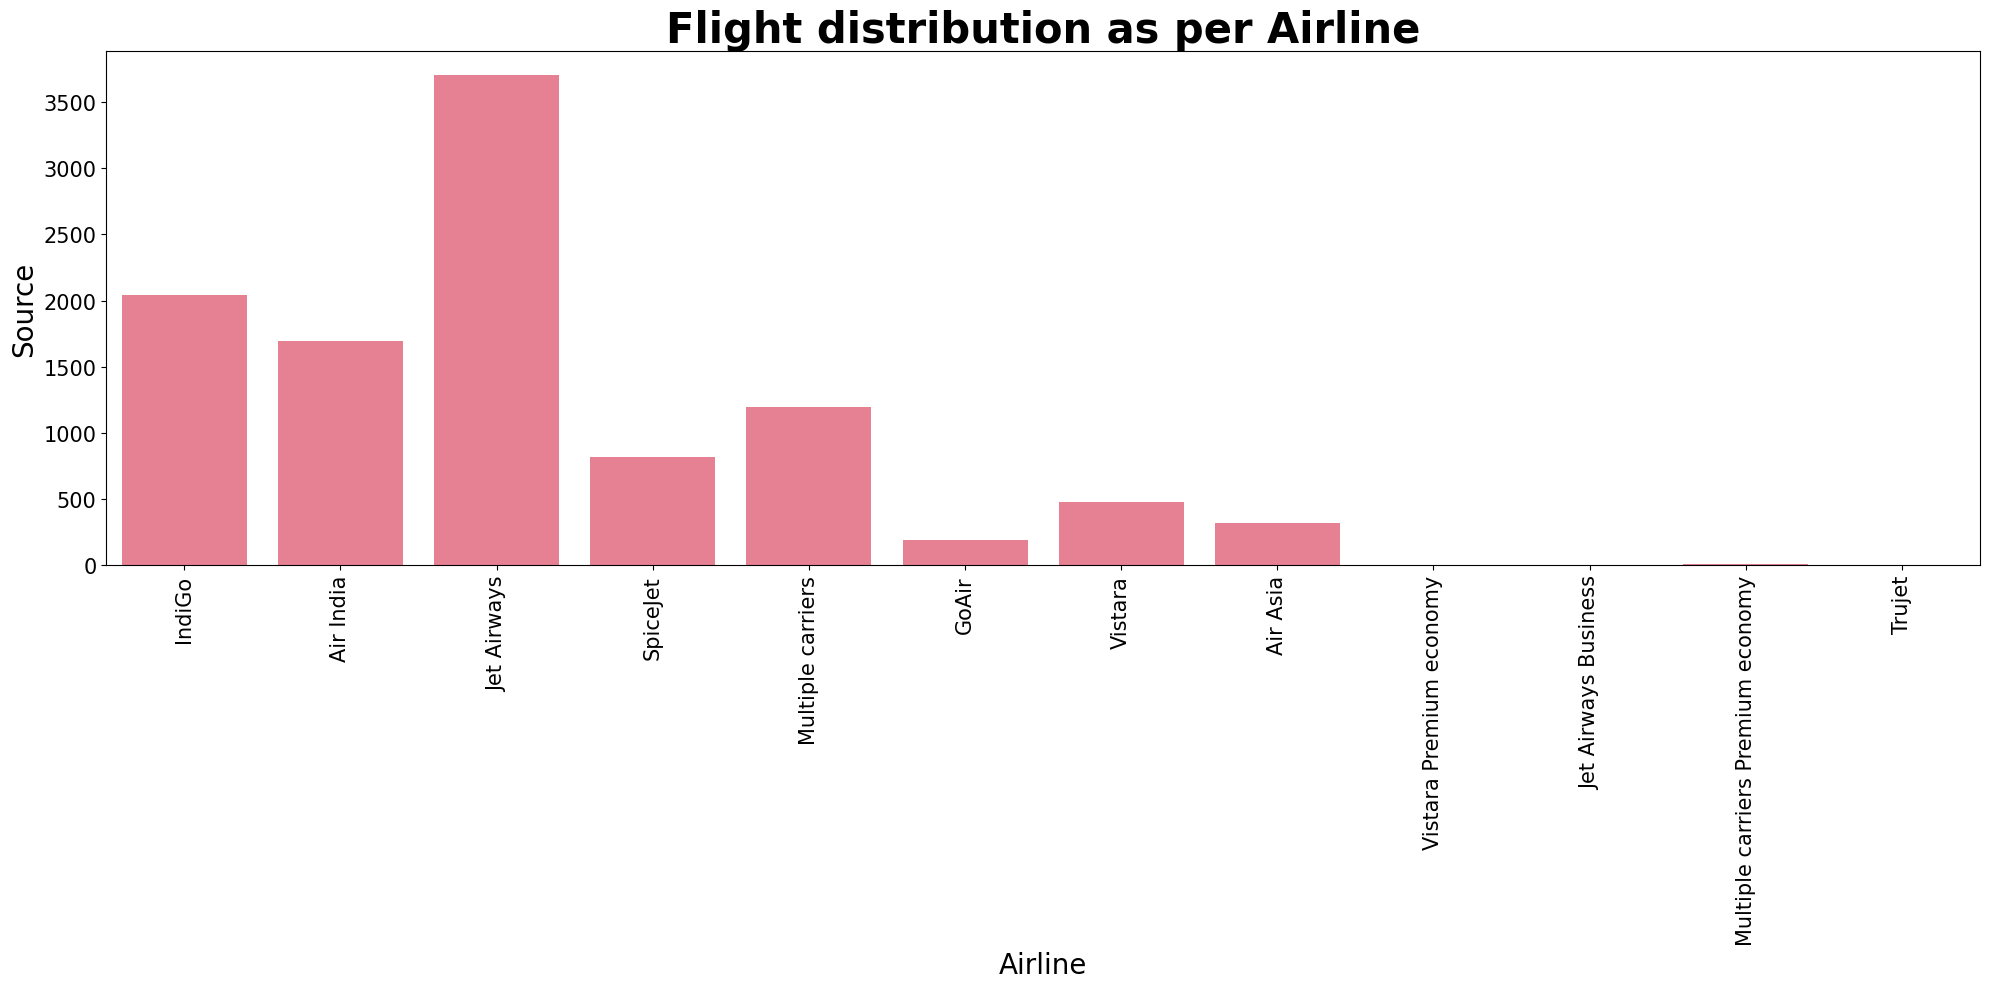

In [75]:
plt.figure(figsize=(20,10))
sns.countplot(x='Airline',data=data)
plt.title('Flight distribution as per Airline',fontsize=30,fontweight='bold')
plt.xlabel('Airline',fontsize=20)
plt.ylabel('Source',fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.show()

#### Insights
* More people travelled via Jet airways.
* There are very few premium classes.

### Price according to the Airlines

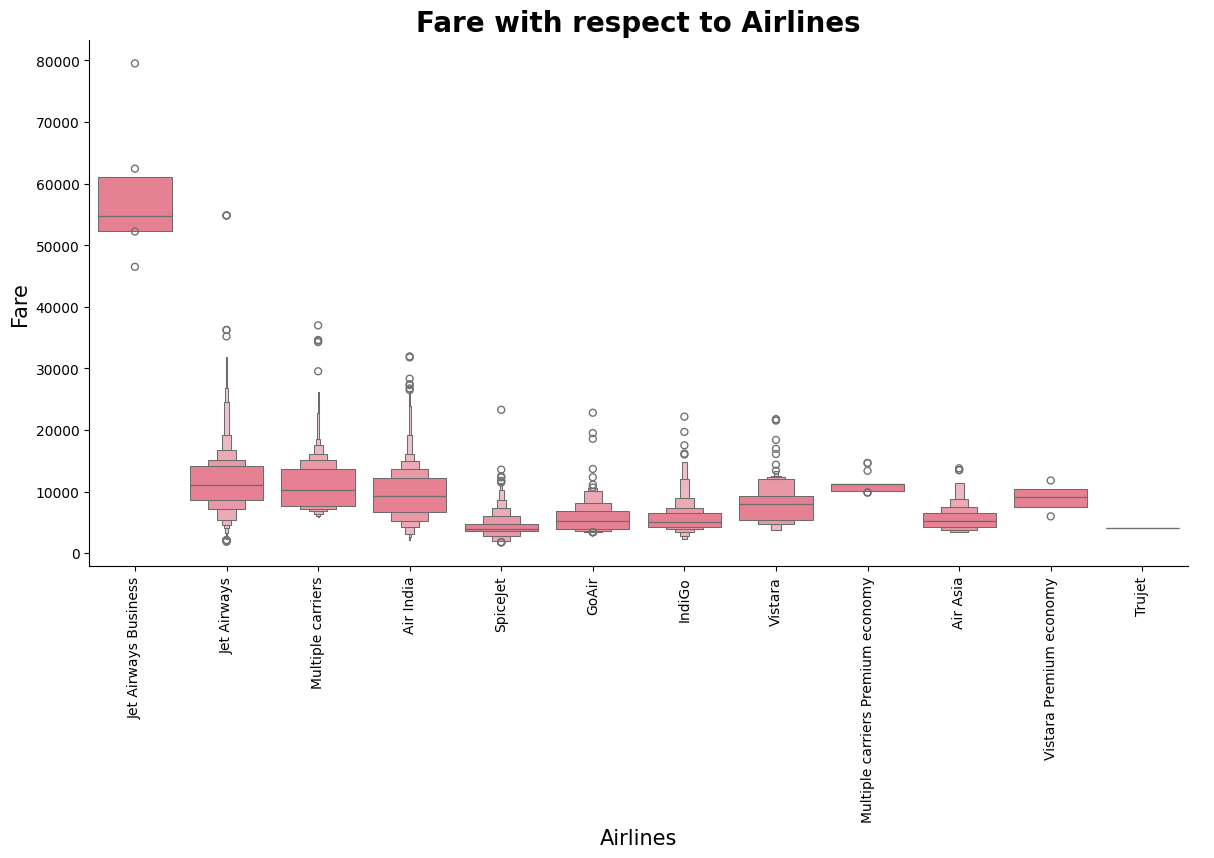

In [76]:
sns.catplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=2)
plt.title('Fare with respect to Airlines',fontsize=20,fontweight='bold')
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Fare',fontsize=15)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.show()

#### Insights
* Among all airways, Jet airways has the maximum price.
* Goair and Indigo airlines have the similar ticket price.

### Duration and Price

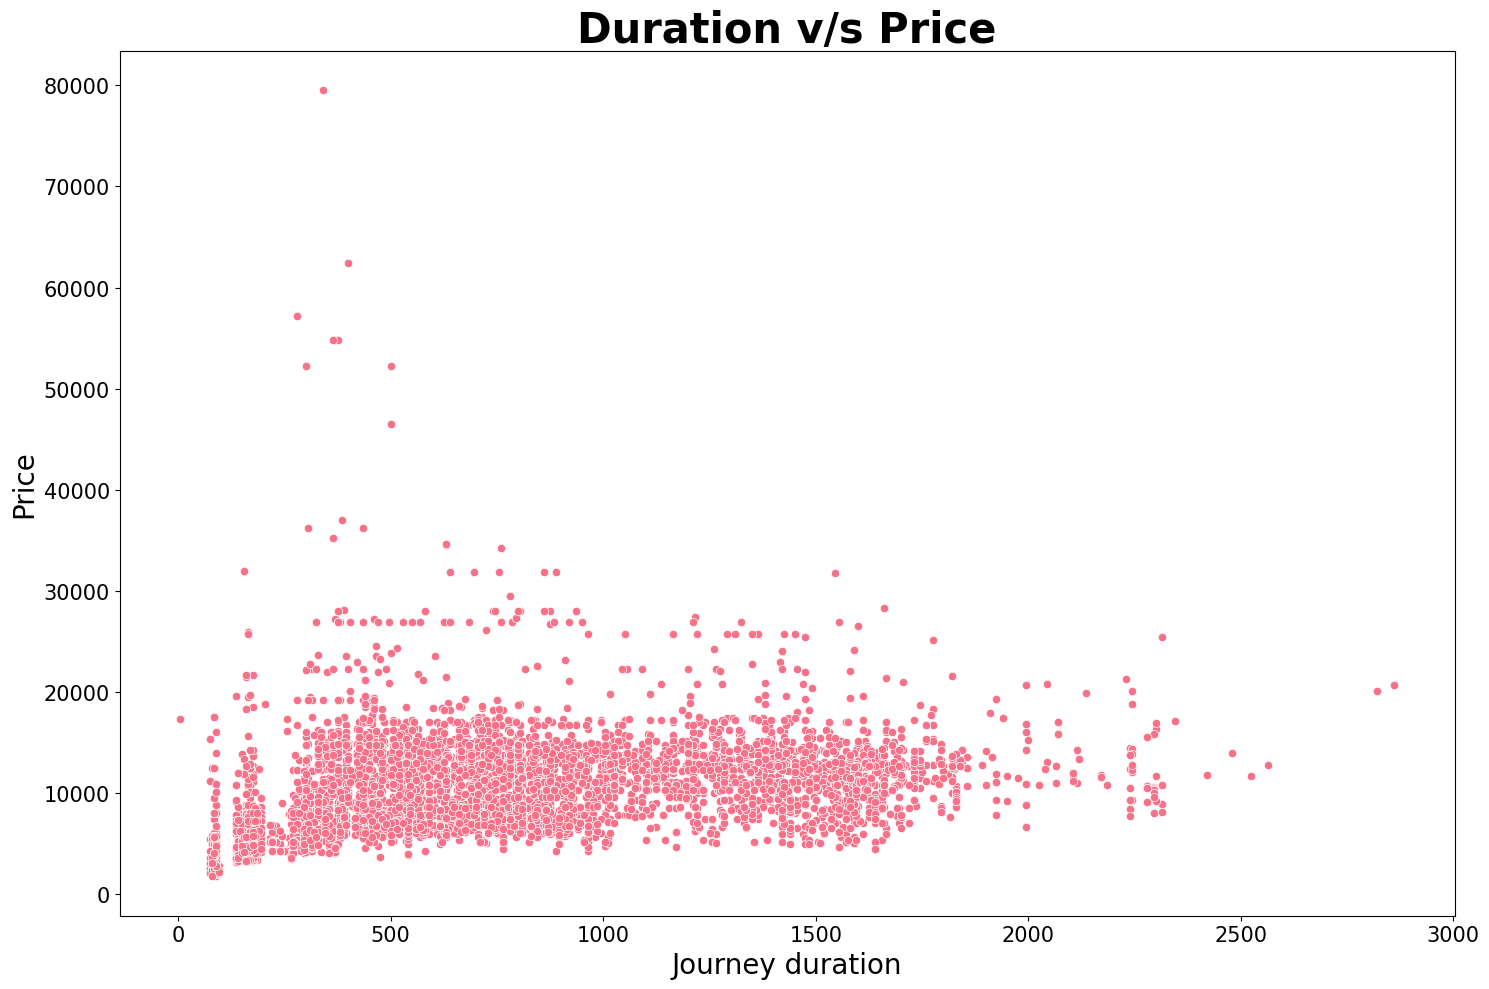

In [77]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Duration',y='Price',data=data)
plt.title('Duration v/s Price',fontsize=30,fontweight='bold')
plt.xlabel('Journey duration',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Insights
* Duration and price are usually directly proportional. But here we can't see any proportionality. This is maybe other factors affecting both of these.

### Total Stops v/s Price

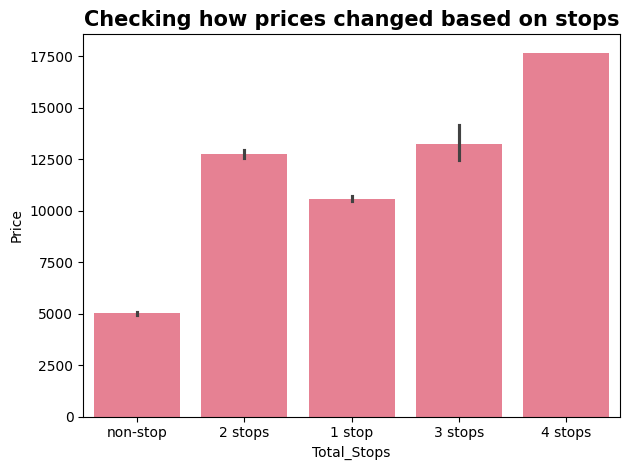

In [78]:
sns.barplot(x='Total_Stops',y='Price',data=data)
plt.title('Checking how prices changed based on stops',fontsize=15,fontweight='bold')
plt.show()

#### Insights
* As the number of stops increases, the fare also increases.

### Journey day, Journey month, Dep hour and Dep min v/s Price

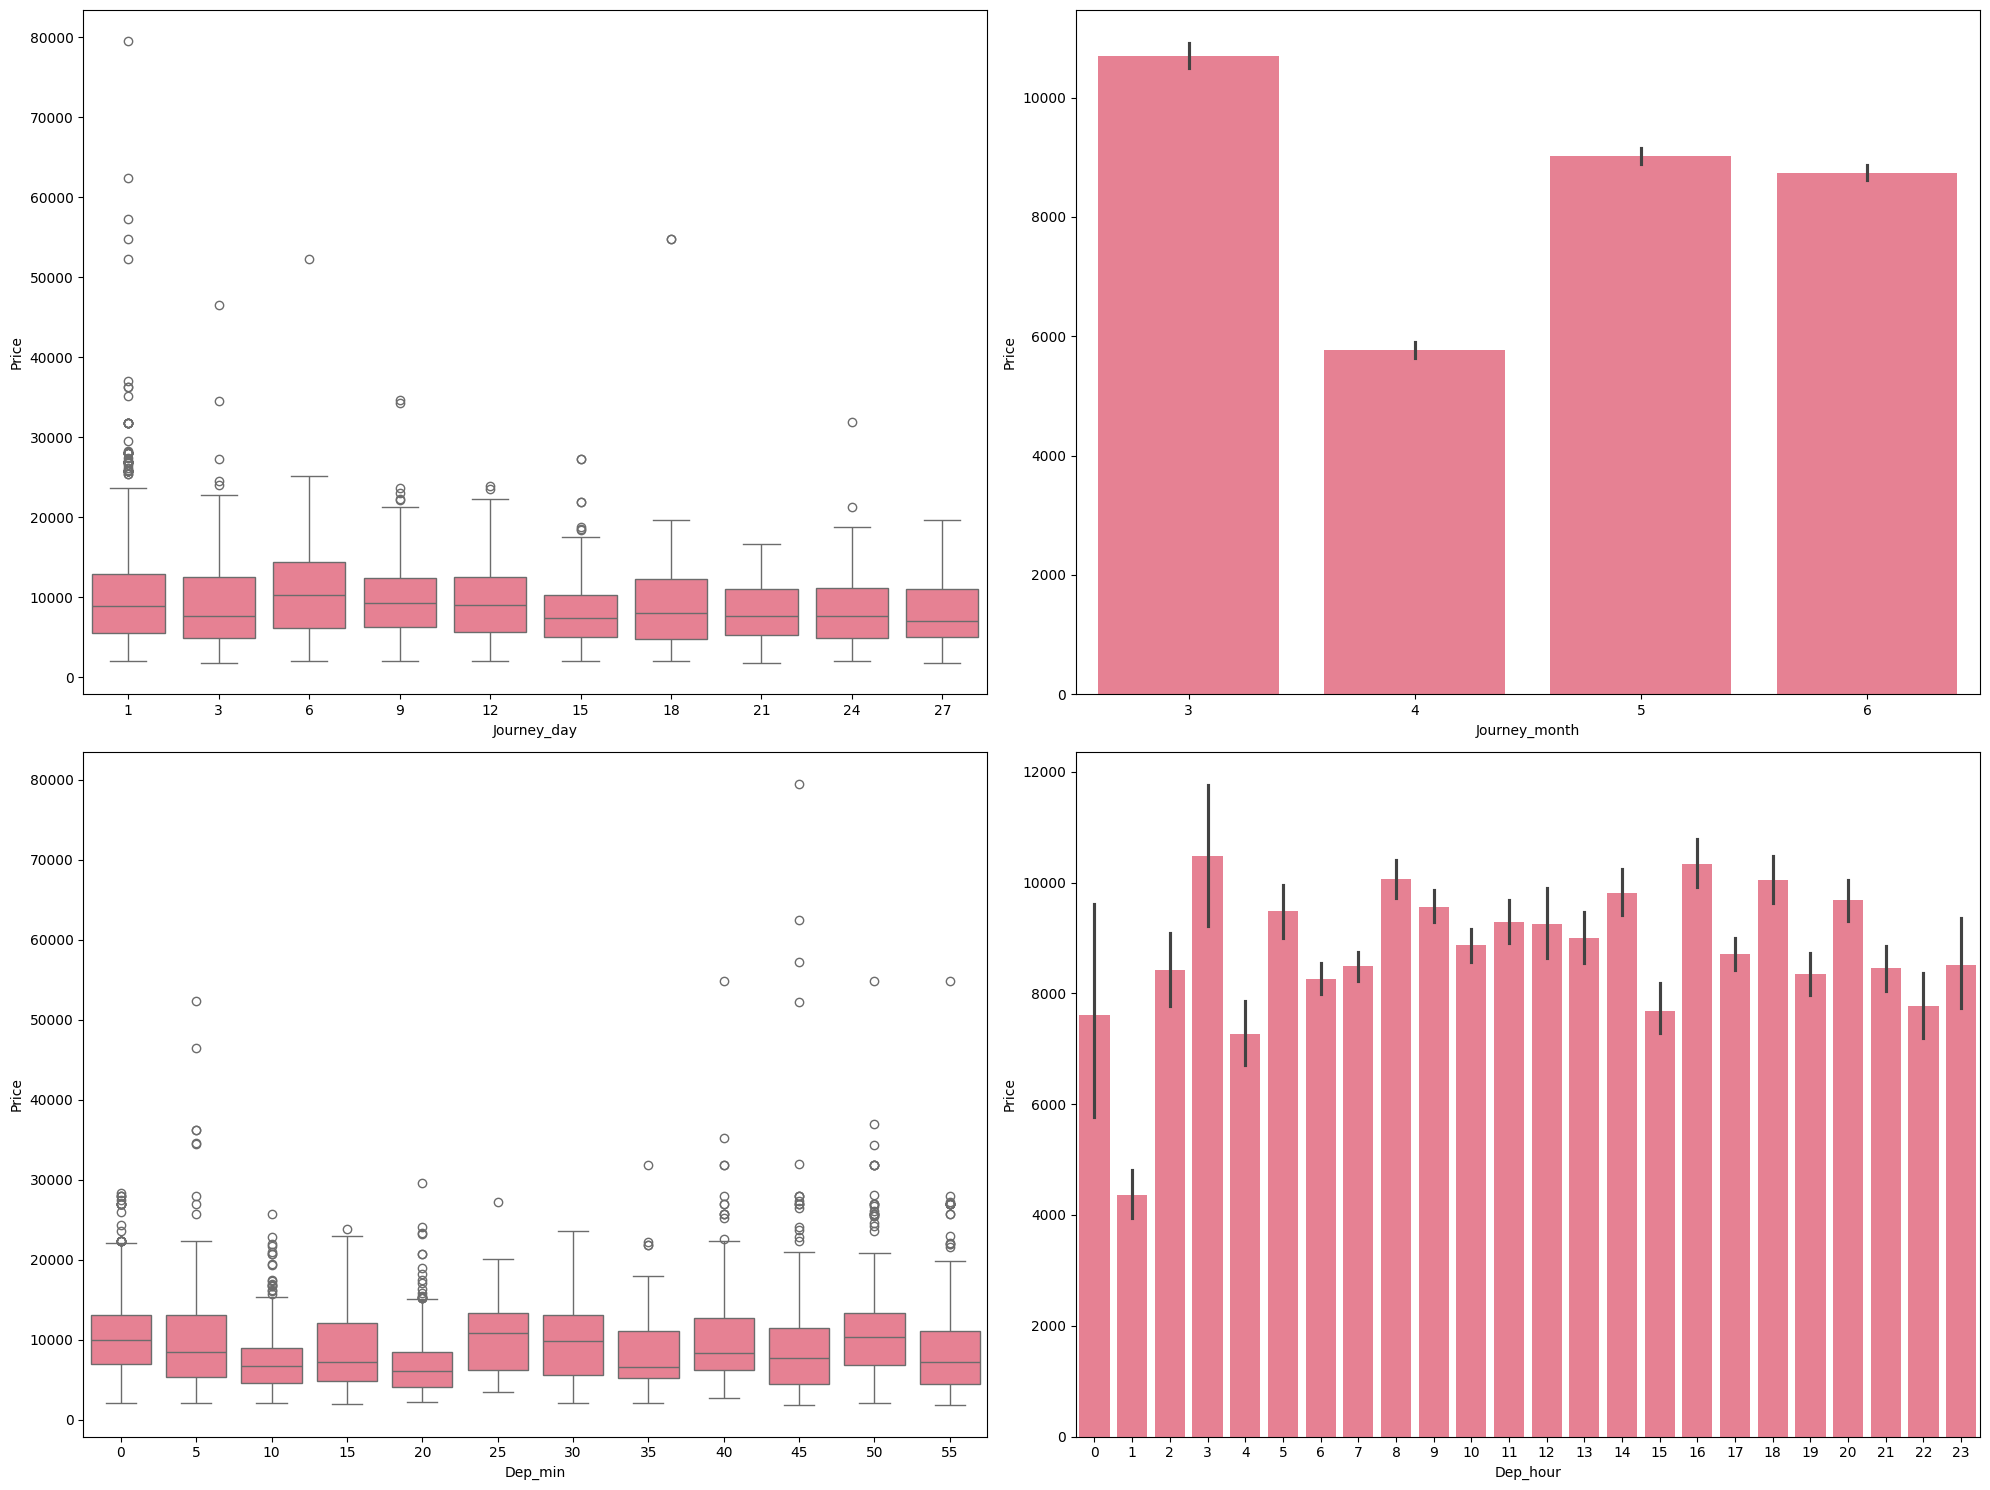

In [79]:
f,ax = plt.subplots(2,2,figsize=(20,15))

sns.boxplot(x='Journey_day',y='Price',data=data,ax=ax[0,0])

sns.barplot(x='Journey_month',y='Price',data=data,ax=ax[0,1])

sns.boxplot(x='Dep_min',y='Price',data=data,ax=ax[1,0])

sns.barplot(x='Dep_hour',y='Price',data=data,ax=ax[1,1])

plt.show()

#### Insights
* Ticket price is high on day 3 followed by day 18.
* Ticket price is high on January month while it's very less on April.

## Converting categorical data into numerical using Label Encoder

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    data[i]=le.fit_transform(data[i])
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,2,18,170,4,7,3897,24,3,22,20,1,10
1,1,3,0,84,445,1,7,7662,1,5,5,50,13,15
2,4,2,1,118,1140,1,7,13882,9,6,9,25,4,25
3,3,3,0,91,325,0,7,6218,12,5,18,5,23,30
4,3,0,2,29,285,0,7,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,4,7,4107,9,4,19,55,22,25
10679,1,3,0,64,155,4,7,4145,27,4,20,45,23,20
10680,4,0,2,18,180,4,7,7229,27,4,8,20,11,20
10681,10,0,2,18,160,4,7,12648,1,3,11,30,14,10


In [81]:
data.columns.to_series().groupby(data.dtypes).groups

{int32: ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'], int64: ['Duration', 'Price']}

# Feature selection and Engineering

## Outliers detection and removal

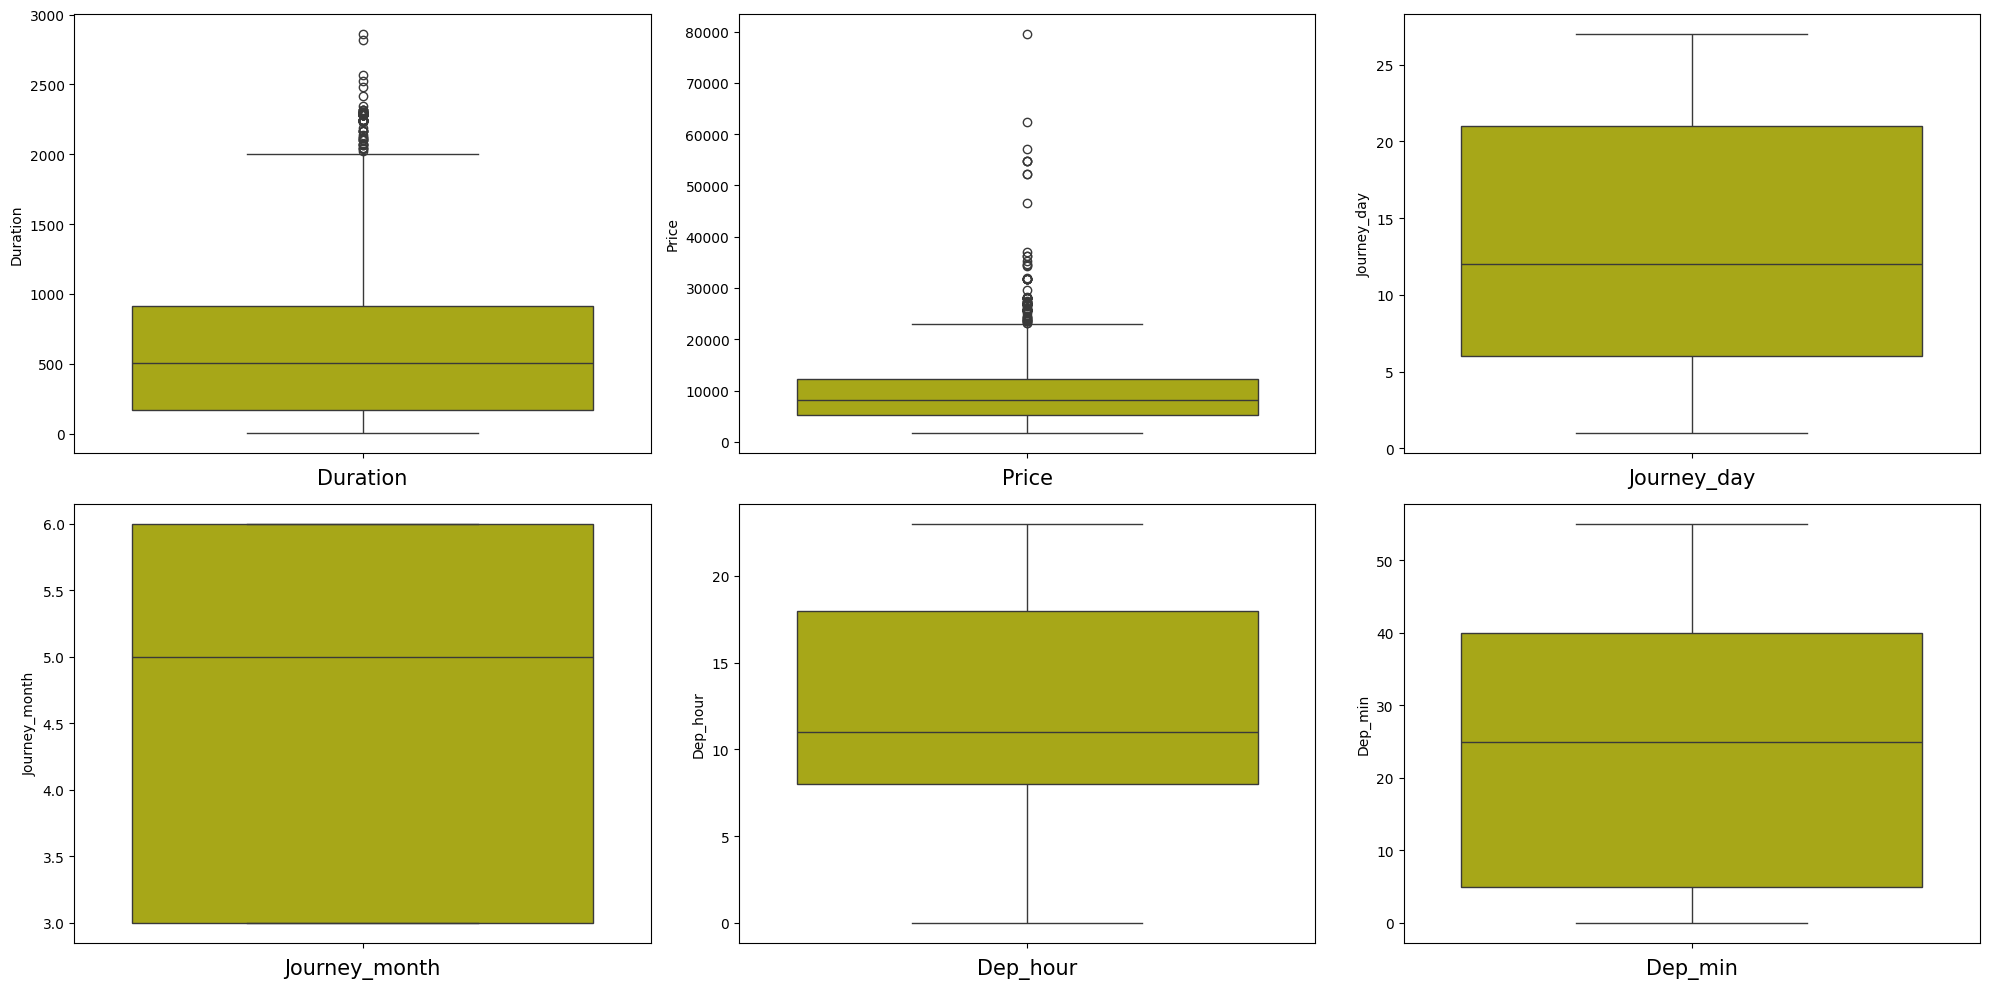

In [82]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(data[column],color='y')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

#### Insights
* There are outliers in Duration, Journey day and Journey month.

#### Imputing outliers in Duration with median

In [83]:
q1 = data.Duration.quantile(.25)
q3 = data.Duration.quantile(.75)
IQR = q3-q1
lower_limit = q1 - (1.5*IQR)
upper_limit = q3 + (1.5*IQR)

In [84]:
data[data.Duration<lower_limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min


In [85]:
data[data.Duration>upper_limit]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
226,4,2,1,113,2245,1,7,18799,3,3,5,25,18,50
470,4,2,1,126,2045,1,7,13082,21,3,18,20,4,25
553,1,2,1,97,2295,1,7,10598,9,3,5,0,19,15
919,1,3,0,63,2115,2,7,10991,12,5,12,0,23,15
925,4,2,1,107,2135,1,7,19907,6,3,16,50,4,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,1,2,1,102,2240,1,7,13748,3,3,5,55,19,15
10020,1,2,1,97,2295,1,7,9653,9,5,5,0,19,15
10326,1,0,2,16,2420,1,7,11791,3,3,5,50,22,10
10456,4,2,1,97,2860,1,7,20694,6,3,19,10,18,50


In [86]:
data.Duration.median()

505.0

In [87]:
#imputing outliers with median since it is not normal distribution
data.loc[data.Duration>upper_limit,'Duration']=505.0

#### Imputing outliers in Journey_month with median

In [88]:
q1 = data.Journey_month.quantile(.25)
q3 = data.Journey_month.quantile(.75)
IQR = q3-q1
lower_limit1 = q1 - (1.5*IQR)
upper_limit1 = q3 + (1.5*IQR)

In [89]:
data[data.Journey_month>upper_limit1]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min


In [90]:
(data[data.Journey_month>upper_limit1].shape[0]/data.shape[0])*100

0.0

#### Insights
* The outliers are about 10%. So we do not impute them

## Correlation

In [91]:
data.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.012048,0.068618,0.029681,-0.138355,0.034396,-0.075468,-0.036549,0.027102,0.026188,-0.032280,-0.062383,-0.005157,-0.072935
Source,-0.012048,1.000000,-0.432494,0.403587,0.170424,-0.222515,-0.015212,0.013596,0.005440,0.180696,0.060771,-0.056734,0.027701,0.021073
Destination,0.068618,-0.432494,1.000000,-0.229323,-0.397083,0.509205,0.058760,-0.260673,0.003586,-0.149704,-0.089346,0.096899,-0.061327,0.007413
Route,0.029681,0.403587,-0.229323,1.000000,0.268953,-0.435871,0.051149,0.154196,0.079704,0.236358,-0.074781,-0.071013,0.021043,-0.174527
Duration,-0.138355,0.170424,-0.397083,0.268953,1.000000,-0.630513,-0.167518,0.501381,-0.029441,0.027170,0.023712,-0.018430,0.048295,-0.073170
Total_Stops,0.034396,-0.222515,0.509205,-0.435871,-0.630513,1.000000,0.146193,-0.571908,0.030346,-0.021046,0.039929,0.049358,-0.098865,0.177065
Additional_Info,-0.075468,-0.015212,0.058760,0.051149,-0.167518,0.146193,1.000000,-0.067162,-0.012895,-0.043172,-0.056370,-0.022718,0.026803,0.042353
Price,-0.036549,0.013596,-0.260673,0.154196,0.501381,-0.571908,-0.067162,1.000000,-0.158960,-0.113613,0.005392,-0.024210,0.030841,-0.086295
Journey_day,0.027102,0.005440,0.003586,0.079704,-0.029441,0.030346,-0.012895,-0.158960,1.000000,-0.038363,-0.003387,-0.004928,-0.002428,-0.015125
Journey_month,0.026188,0.180696,-0.149704,0.236358,0.027170,-0.021046,-0.043172,-0.113613,-0.038363,1.000000,0.040874,-0.062723,0.000902,-0.099581


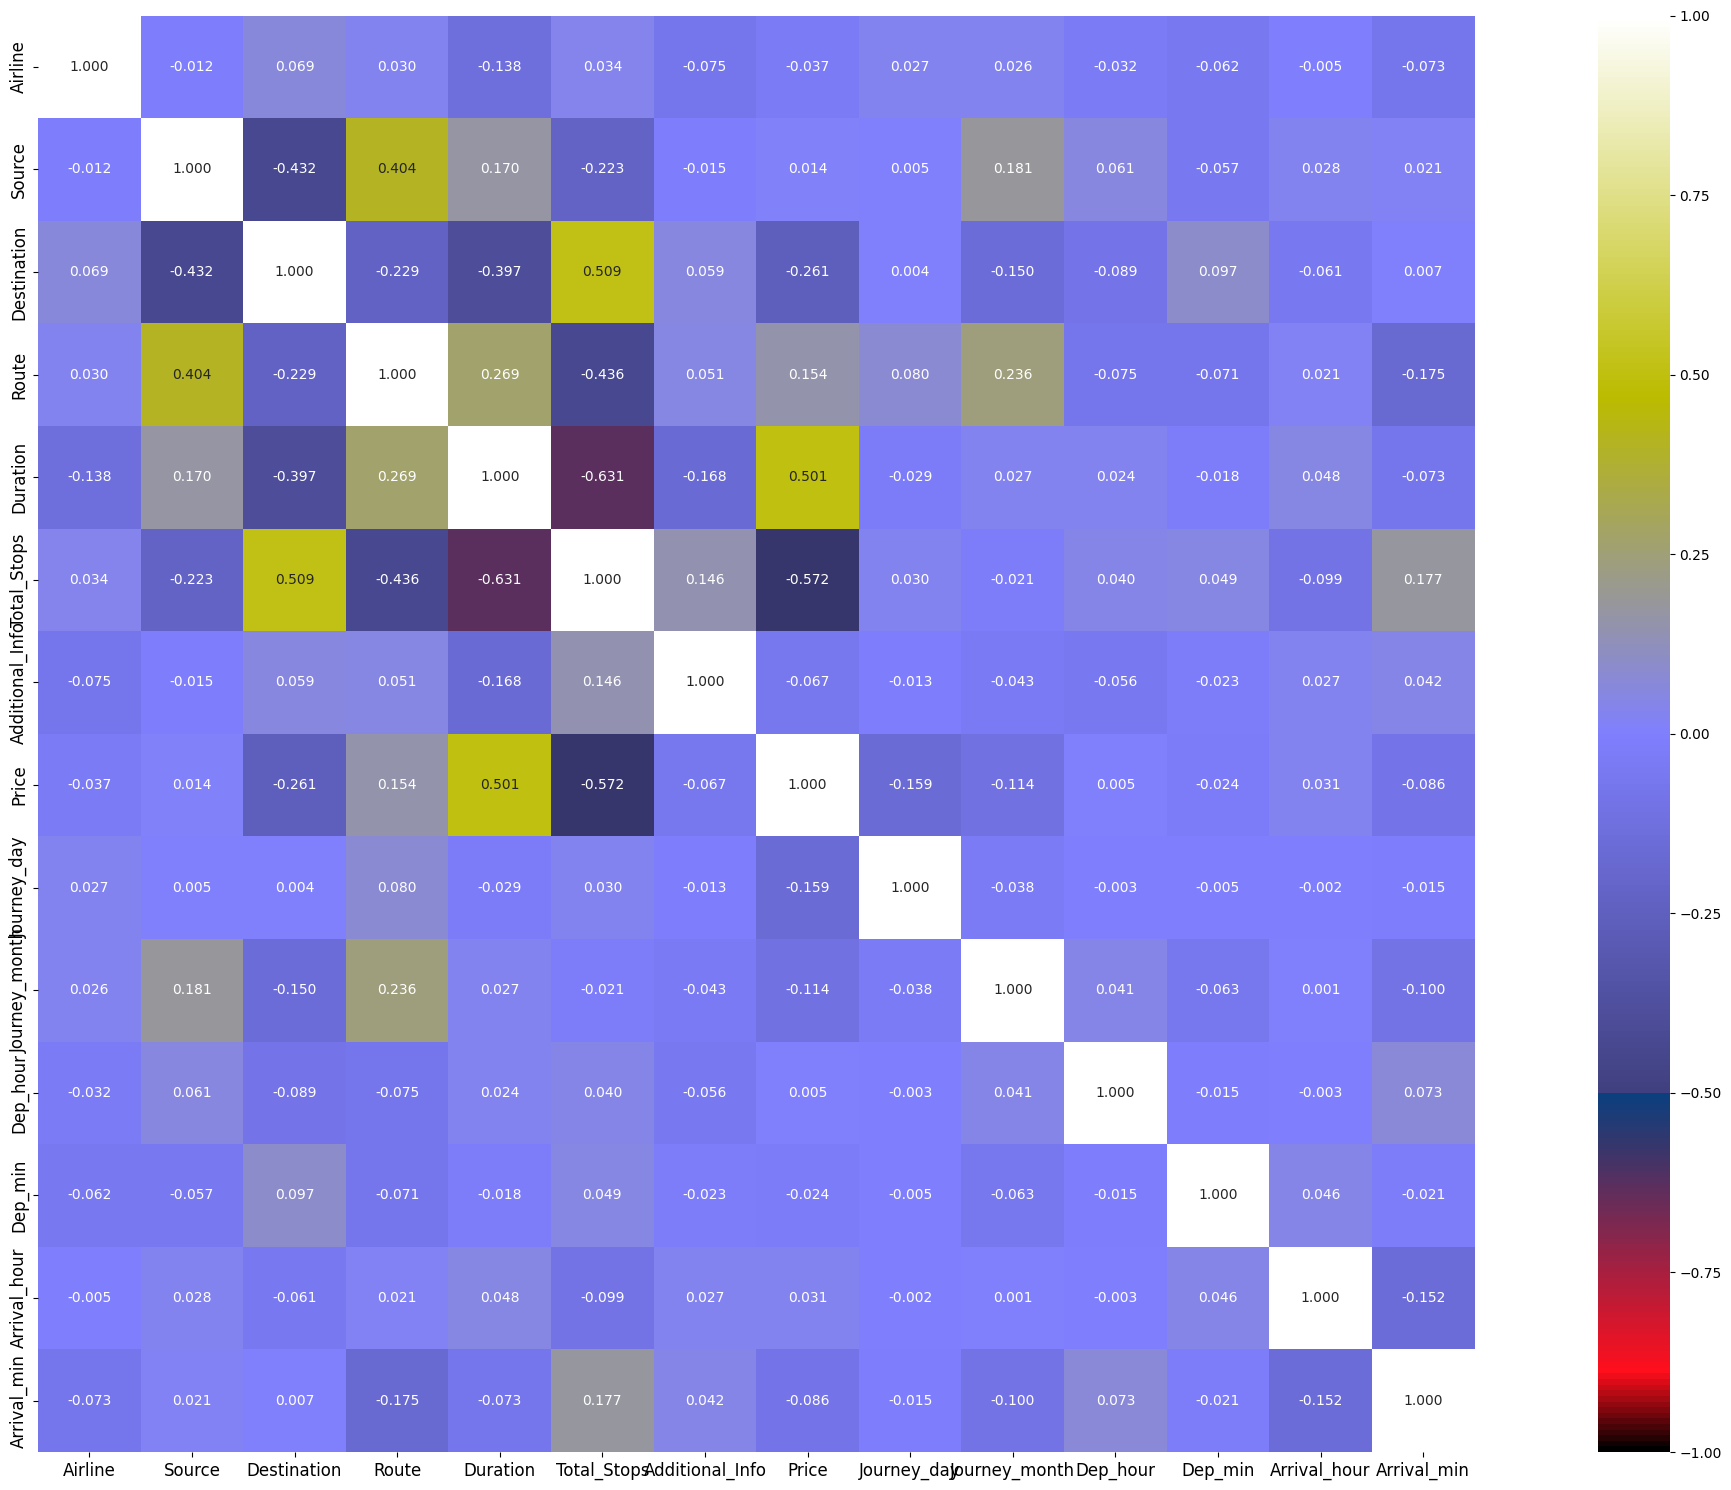

In [92]:
#heatmap
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Splitting the data

In [93]:
#splitting
x = data.drop('Additional_Info',axis=1,inplace=True)
x =  data.drop('Price',axis=1)
y = data.Price

## Scaling the data using Standard scaler

In [94]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)

## Machine learning model building

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [96]:
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=214,test_size=0.25)
print('Training data shape :',x_train.shape)
print('Testing data shape :',x_test.shape)

Training data shape : (7845, 12)
Testing data shape : (2616, 12)


## Applying other ML models

In [97]:
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
xgb = XGBRegressor()

models = [rf,et,xgb]
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    y_pred = m.predict(x_test)
    y_pred_train = m.predict(x_train)
    print('\n')
    print('\033[1m',m,':'+'\033[0m')
    print('\n')
    print('\033[1m'+'Test accuracy :-'+'\033[0m')
    print('Mean squarred error :',mean_squared_error(y_test,y_pred))
    print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
    print('Root mean squarred error :',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('R2 Score:',r2_score(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Train Accuracy :-'+'\033[0m')
    print('Mean squarred error :',mean_squared_error(y_train,y_pred_train))
    print('Mean absolute error :',mean_absolute_error(y_train,y_pred_train))
    print('Root mean squarred error :',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('R2 Score:',r2_score(y_train,y_pred_train))
    print('=======================================')



 RandomForestRegressor() :


Test accuracy :-
Mean squarred error : 3673034.282199759
Mean absolute error : 1142.706330280597
Root mean squarred error : 1916.5161836519303
R2 Score: 0.8233754807542119


Train Accuracy :-
Mean squarred error : 1028373.7691732832
Mean absolute error : 563.8040199988561
Root mean squarred error : 1014.087653594739
R2 Score: 0.9523542187085771


 ExtraTreesRegressor() :


Test accuracy :-
Mean squarred error : 4161308.568680467
Mean absolute error : 1177.187630351682
Root mean squarred error : 2039.928569504449
R2 Score: 0.799895925573451


Train Accuracy :-
Mean squarred error : 611328.4054142894
Mean absolute error : 302.51826811132355
Root mean squarred error : 781.8749295215248
R2 Score: 0.9716764270202854


 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metr

## Cross validation

In [98]:
for m in models:
    score = cross_val_score(m,x,y,cv=5)
    print('\n')
    print('Cross validation score :',m)
    print('Mean CV Score :',score.mean())
    print('\n')
    print('================================')



Cross validation score : RandomForestRegressor()
Mean CV Score : 0.801210370859353




Cross validation score : ExtraTreesRegressor()
Mean CV Score : 0.7826315480069693




Cross validation score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean CV Score : 0.8384383201599122




#### Insights
* We are getting r2 score as 90.41 and CV score as 89.91 for ExtraTreesRegressor and as 90.67 and 89.28 for XGBRegressor. So we will do hyper parameter tuning for these model.

## Hyper Parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

#parameters for XGBRegressor
xgb_param = {'n_estimators':[50,60,75,100],
             'gamma':np.arange(0,0.2,0.1),
            'booster':['gbtree','dart','gblinear'],
             'max_depth':[2,4,6,8],
            'eta':[0.001,0.01,0.1]}

#parameters for ExtraTreesregressor
et_param = {'n_estimators': [50,60,75,100,150], 
    'max_features': ['auto', 'sqrt'],     
    'max_depth': np.arange(10, 110, 20),  
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],         
    'bootstrap': [True, False]}


In [100]:
GCV_xgb = GridSearchCV(XGBRegressor(),param_grid=xgb_param,verbose=10)

In [101]:
GCV_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=0.045 total time=   0.0s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=0.033 total time=   0.0s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=0.042 total time=   0.0s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=0.043 total time=   0.0s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 5/5; 1/

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'dart', 'gblinear'],
                         'eta': [0.001, 0.01, 0.1], 'gamma': array([0. , 0.1]),
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [50, 60, 75, 100]},
             verbose=10)

In [102]:
GCV_xgb.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 6,
 'n_estimators': 100}

In [103]:
GCV_et = GridSearchCV(ExtraTreesRegressor(),param_grid=et_param,verbose=10)

In [104]:
GCV_et.fit(x_train,y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV 1/5; 1/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 1/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5; 1/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 1/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5; 1/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 1/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 1/900] START bootstrap=True, max_depth=10, max_features=auto, min_sample

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([10, 30, 50, 70, 90]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 60, 75, 100, 150]},
             verbose=10)

In [105]:
GCV_et.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

### XGBRegressor

In [106]:
XGB_model = XGBRegressor(n_estimators=100, booster='gbtree', eta=0.1, max_depth=8, gamma=0)
XGB_model.fit(x_train,y_train)
y_pred = XGB_model.predict(x_test)
print('Error in final model :')
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Root mean squarred error :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2 Score:')
print(r2_score(y_test,y_pred))

Error in final model :
Mean squarred error : 3119042.5310042524
Mean absolute error : 1111.509744113374
Root mean squarred error : 1766.0811224301822


R2 Score:
0.8500151634216309


### ExtraTreesRegressor

In [107]:
ET_model = ExtraTreesRegressor(bootstrap= False,max_depth= 50,max_features= 'sqrt',min_samples_leaf= 1,min_samples_split= 5,
 n_estimators= 400)
ET_model.fit(x_train,y_train)
y_pred = ET_model.predict(x_test)

print('Error in final model :')
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Root mean squarred error :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2 Score:')
print(r2_score(y_test,y_pred))

Error in final model :
Mean squarred error : 3713092.906069187
Mean absolute error : 1226.4813701580022
Root mean squarred error : 1926.9387395735203


R2 Score:
0.8214491891274569


#### Insights
* From these 2 models, after parameter tuning, ExtraTreesRegressor model has the highest accuracy which is 91.29. So it is selected as the final model.

# Final Regression Model

In [108]:
ET_model = ExtraTreesRegressor(bootstrap= False,max_depth= 50,max_features= 'sqrt',min_samples_leaf= 1,min_samples_split= 5,
 n_estimators= 400)
ET_model.fit(x_train,y_train)
y_pred = ET_model.predict(x_test)

print('\033[1m'+'Error in final model :'+'\033[0m')
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Root mean squarred error :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+'R2 Score :'+'\033[0m')
print(r2_score(y_test,y_pred))

Error in final model :
Mean squarred error : 3703565.9575331956
Mean absolute error : 1224.9352243405965
Root mean squarred error : 1924.4651094611188


R2 Score :
0.8219073097372218


In [109]:
import pickle

In [110]:
with open('ET_model.pkl', 'wb') as f:
    pickle.dump(ET_model, f)